In [1]:
%run ../input/python-recipes/dhtml.py
dhtml('Creating Labeled and Measured Synthetic Images')

In [2]:
import numpy as np,pandas as pd
import os,h5py,seaborn as sn,pylab as pl
from skimage.transform import resize
def randintcoord(img_size_out,img_size=1024):
    a=(.5+.1**6*np.random.randint(1,999999))*\
      np.random.choice([-1,1],1)[0]
    b=np.random.randint(3,10)
    c=.1**3*np.random.randint(1,99)*\
      np.random.choice([-1,1],1)[0]
    t=np.arange(0,12*np.pi,1/(1440*b))
    fx=np.sin(t/6)+a*np.sin(b*t)*np.cos(t)-\
       c*np.sin(16*b*t)
    fy=np.cos(t/6)+a*np.sin(b*t)*np.sin(t)-\
       c*np.cos(16*b*t)
    fx=.951*(fx-1.051*fx.min())/(fx.max()-fx.min())
    fy=.951*(fy-1.051*fy.min())/(fy.max()-fy.min())
    fx=np.array(np.clip(fx*img_size,0,img_size),
                dtype='int32')
    fy=np.array(np.clip(fy*img_size,0,img_size),
                dtype='int32')
    f=np.array([[fx[i],fy[i]] for i in range(len(t))])
    img=np.ones((img_size,img_size,3))
    randcol=.9-.8*np.random.random(3)
    for [x,y] in f: img[y,x,:]=randcol
    img=resize(img,(img_size_out,img_size_out))
    return img,np.around(a,6),b,np.around(c,3),randcol

In [3]:
dhtml('Created Data Examples')

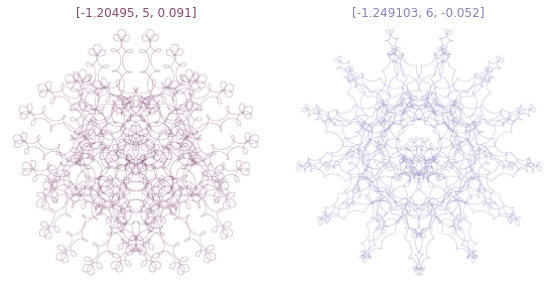

In [4]:
img_size=256
fig=pl.figure(figsize=(8,4))
for i in range(2):
    img,a,b,c,col=randintcoord(img_size)
    ax=fig.add_subplot(1,2,i+1)
    pl.imshow(img); pl.axis('off');
    pl.title(str([a,b,c]),color=col)
pl.tight_layout();

In [5]:
dhtml('Data Storing')

In [6]:
num_images=800
images=np.zeros((num_images,img_size,img_size,3),
                dtype=np.float32)
labels=np.zeros((num_images,),dtype=np.int32)
targets=np.zeros((num_images,2),dtype=np.float32)
colors=np.zeros((num_images,3),dtype=np.float32)
for i in range(num_images):
    if (i+1)%int(.1*num_images)==0:
        print('=>',end='',flush=True)
    img,a,b,c,col=randintcoord(img_size)
    images[i,:,:,:]=img
    labels[i],targets[i,0],targets[i,1]=b-3,a,c
    colors[i,:]=col

=>=>=>=>=>=>=>=>=>=>

In [7]:
h5f='ArtificialImages'+str(img_size)+'.h5'
with h5py.File(h5f,'w') as f:
    f.create_dataset(
        'images',data=images,compression='gzip')
    f.create_dataset(
        'labels',data=labels,compression='gzip')
    f.create_dataset(
        'targets',data=targets,compression='gzip')
    f.create_dataset(
        'colors',data=colors,compression='gzip')
    f.close()
print('\nfile size: %s'%list(os.stat(h5f))[6])


file size: 227457276


In [8]:
with h5py.File(h5f,'r') as f:
    keys=list(f.keys()); print(keys)
    images=np.array(f[keys[1]])
    labels=np.array(f[keys[2]])
    targets=np.array(f[keys[3]])
    colors=np.array(f[keys[0]])
    f.close()

['colors', 'images', 'labels', 'targets']


In [9]:
dhtml('Stored Data')

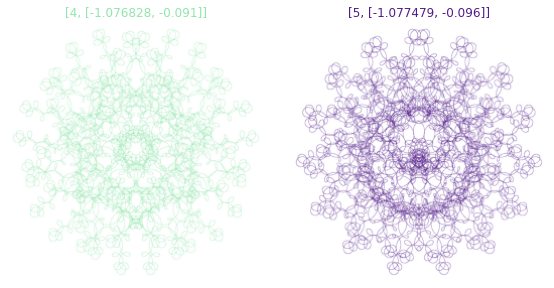

In [10]:
fig=pl.figure(figsize=(8,4))
for i in range(2):
    randi=np.random.randint(1,100,2)
    ax=fig.add_subplot(1,2,i+1)
    pl.imshow(images[randi[i]]); pl.axis('off')
    ti=str([labels[randi[i]],
            list(targets[randi[i]])])
    pl.title(ti,color=colors[randi[i]])
pl.tight_layout();

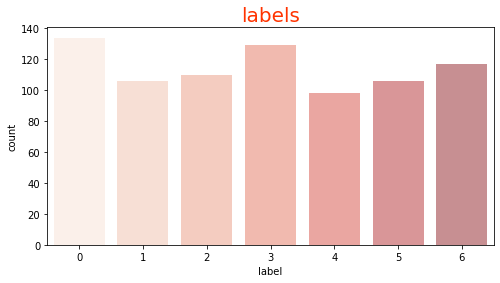

In [11]:
df=pd.DataFrame(labels,columns=['label'])
pl.figure(figsize=(8,4)); pl.tight_layout()
sn.countplot(x='label',data=df,palette='Reds',alpha=.5)
pl.title('labels',fontsize=20,color='#ff3300');

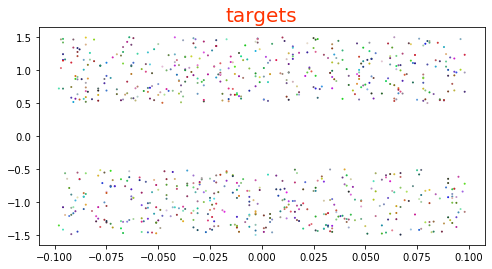

In [12]:
pl.figure(figsize=(8,4)); pl.tight_layout()
pl.scatter(targets[:,1],targets[:,0],s=1,color=colors);
pl.title('targets',fontsize=20,color='#ff3300');